## Analisis financiero por Empresa

#### En este ejemplo, se define una lista de símbolos de empresas que se desean extraer (AAPL para Apple, MSFT para Microsoft y AMZN para Amazon), y se utiliza la misma función download de yfinance para extraer los datos de todas las empresas en la lista.

In [29]:
# empresas: Apple, Microsoft, 
import yfinance as yf

# Definir una lista de símbolos de empresas que se desean extraer
symbols = ['AAPL', 'MSFT', 'AMZN']

# Extraer los datos de las empresas utilizando yfinance
data = yf.download(symbols, start='2000-01-01')

# Imprimir los datos
print(data.head())


[*********************100%***********************]  3 of 3 completed
           Adj Close                          Close                      \
                AAPL      AMZN       MSFT      AAPL      AMZN      MSFT   
Date                                                                      
2000-01-03  0.850644  4.468750  36.361568  0.999442  4.468750  58.28125   
2000-01-04  0.778926  4.096875  35.133274  0.915179  4.096875  56.31250   
2000-01-05  0.790324  3.487500  35.503704  0.928571  3.487500  56.90625   
2000-01-06  0.721930  3.278125  34.314415  0.848214  3.278125  55.00000   
2000-01-07  0.756128  3.478125  34.762833  0.888393  3.478125  55.71875   

                High                          Low                      \
                AAPL      AMZN     MSFT      AAPL      AMZN      MSFT   
Date                                                                    
2000-01-03  1.004464  4.478125  59.3125  0.907924  3.952344  56.00000   
2000-01-04  0.987723  4.575000  58.562

### Comparativa de precios de cierre ajustados para cada empresa del dataset luego del año 2000 a la fecha actual

[*********************100%***********************]  3 of 3 completed


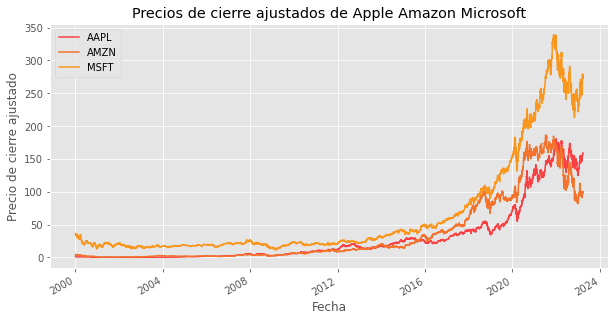

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir los símbolos de las empresas que se desean extraer
symbols = ['AAPL', 'MSFT', 'AMZN']

# Extraer los datos de las empresas utilizando yfinance
data = yf.download(symbols, start='2000-01-01')

# Seleccionar solo los precios de cierre ajustados
adj_close = data['Adj Close']

# Graficar los precios de cierre ajustados
adj_close.plot(figsize=(10, 5))

# Configurar el título y las etiquetas de los ejes
plt.title('Precios de cierre ajustados de Apple Amazon Microsoft')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mostrar la gráfica
plt.show()


### Comparativa de precios de cierre ajustados para el peridodo de tiempo desde el inicio de la pandemia a la fecha actual

[*********************100%***********************]  3 of 3 completed


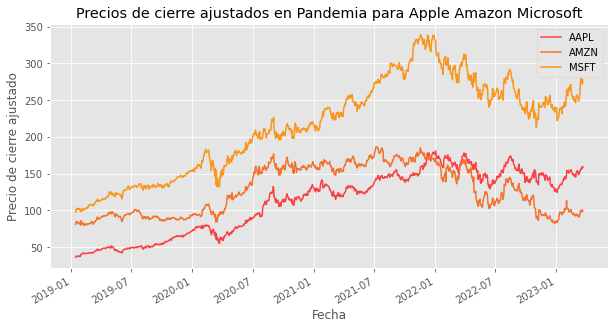

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir los símbolos de las empresas que se desean extraer
symbols = ['AAPL', 'MSFT', 'AMZN']

# Extraer los datos de las empresas utilizando yfinance comenzando con el inicio de la pandemia
data = yf.download(symbols, start='2019-01-12')

# Seleccionar solo los precios de cierre ajustados
adj_close = data['Adj Close']

# Graficar los precios de cierre ajustados
adj_close.plot(figsize=(10, 5))

# Configurar el título y las etiquetas de los ejes
plt.title('Precios de cierre ajustados en Pandemia para Apple Amazon Microsoft')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mostrar la gráfica
plt.show()


[*********************100%***********************]  3 of 3 completed


<Figure size 720x360 with 0 Axes>

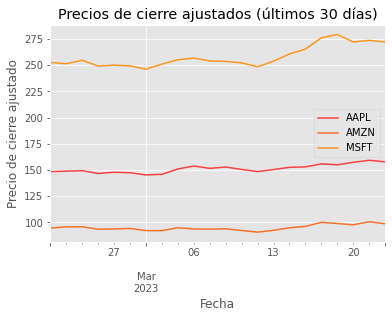

In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Definir el símbolo de la empresa que se desea extraer
symbols = ['AAPL', 'MSFT', 'AMZN']

# Definir la fecha de inicio (hace 30 días)
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")

# Extraer los datos de la empresa utilizando yfinance
data = yf.download(symbols, start=start_date, end=datetime.now().strftime("%Y-%m-%d"))

# Seleccionar solo los precios de cierre ajustados
adj_close = data['Adj Close']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar los precios de cierre ajustados
adj_close.plot()

# Configurar el título y las etiquetas de los ejes
plt.title('Precios de cierre ajustados (últimos 30 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mostrar la gráfica
plt.show()


$$
KpiRatio
$$

In [42]:
# empresas: Apple, Microsoft, 
import yfinance as yf

# Definir una lista de símbolos de empresas que se desean extraer
symbols = ['AAPL']

# Extraer los datos de apple utilizando yfinance
apple_data = yf.download('AAPL', start='2000-01-01')
# Imprimir los datos
print(apple_data.head())

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850644  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778926  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721931  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756128  460734400


In [47]:
import yfinance as yf

# Obtener datos históricos de precios y beneficios de Apple en el S&P500 desde 2000 hasta la fecha actual
aapl = yf.Ticker("AAPL")
data = aapl.history(start="2000-01-01")

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2000-01-03 00:00:00-05:00    0.796974    0.854918    0.772751    0.850643   
2000-01-04 00:00:00-05:00    0.822621    0.840669    0.768951    0.778926   
2000-01-05 00:00:00-05:00    0.788424    0.840194    0.782725    0.790324   
2000-01-06 00:00:00-05:00    0.806473    0.813122    0.721931    0.721931   
2000-01-07 00:00:00-05:00    0.733330    0.767527    0.725731    0.756128   
...                               ...         ...         ...         ...   
2023-03-17 00:00:00-04:00  156.080002  156.740005  154.279999  155.000000   
2023-03-20 00:00:00-04:00  155.070007  157.820007  154.149994  157.399994   
2023-03-21 00:00:00-04:00  157.320007  159.399994  156.539993  159.279999   
2023-03-22 00:00:00-04:00  159.300003  162.139999  157.809998  157.830002   
2023-03-23 00:00:00-04:00  158.830002  161.550003  157.679993  158.929993   